## Exercise 09 : Plotly

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [7]:
connect = sqlite3.connect('data/checking-logs.sqlite')

In [9]:
query = """
    SELECT uid, numTrials, timestamp as date
    FROM checker
    WHERE uid like 'user_%'
        AND status = 'ready'
        AND labname = 'project1'
    """

commits = pd.io.sql.read_sql(query, connect, parse_dates=['date'])
commits['date'] = commits['date'].dt.floor('d')

In [27]:
df = commits.groupby(['date', 'uid']).max()['numTrials'].unstack()
df.index = np.arange(len(df.index))
df.iloc[0] = df.iloc[0].fillna(0)
df = df.fillna(df.ffill())
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
uid,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0,59.0,59.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
user_13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,30.0,32.0,32.0
user_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,18.0,25.0,49.0,92.0,92.0,99.0,99.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,10.0,10.0
user_17,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,6.0,6.0


In [29]:
initial_data = [go.Scatter(x=np.array([]), y=np.array([]),
                           mode='lines+markers', name=name)
                for name in df.index]

In [31]:
frames = [go.Frame(data=[go.Scatter(
    x=np.arange(i + 1), y=np.array(df.iloc[j, :i + 1]),
    mode='lines+markers', name=df.index[j]
    ) for j in range(len(df.index))]) for i in range(len(df.columns) + 1)]

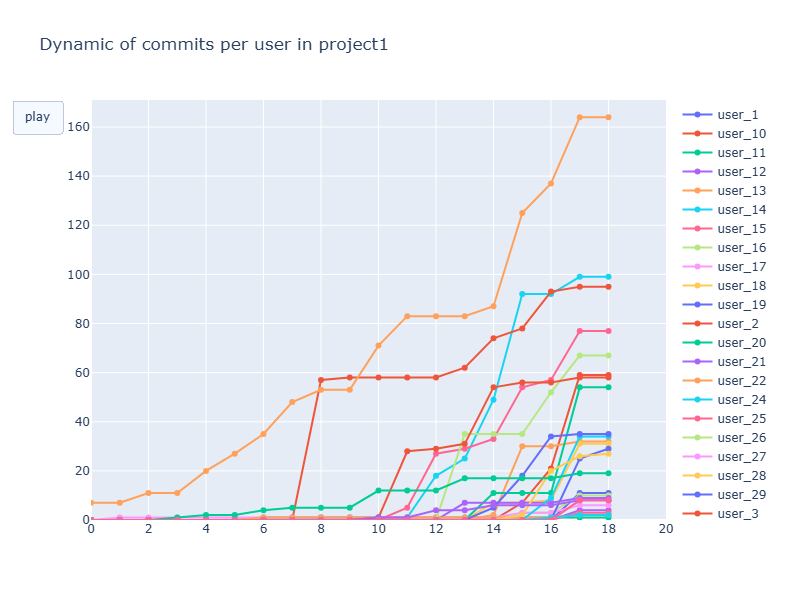

In [59]:
fig = go.Figure(
    data=initial_data,
    layout={
        'width': 850,
        'height': 600,
        'title': 'Dynamic of commits per user in project1',
        'xaxis': {'range': (0, len(df.columns) + 1), 'dtick': 2},
        'yaxis': {'range': (0, round(max(df.max()) + 2, -1) + 1)},
        'updatemenus': [{
            'type': 'buttons',
            'buttons': [{'method': 'animate', 'label': 'play', 'args': [None]}]
            }]}, frames=frames)
fig.show()

In [55]:
connect.close()